In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# EDA 

<Axes: xlabel='count', ylabel='Gender'>

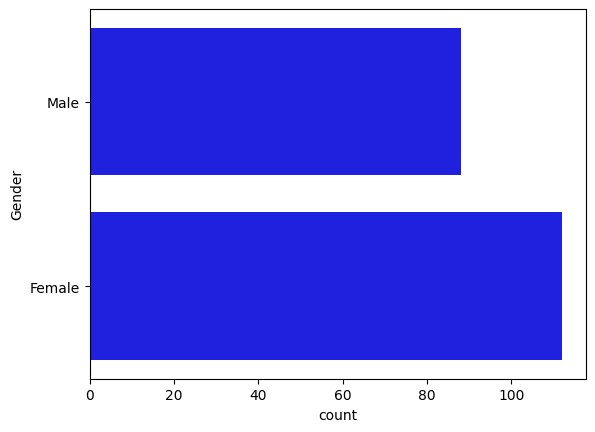

In [6]:
sns.countplot(data['Gender'] , color='blue')

# Histogram (1)

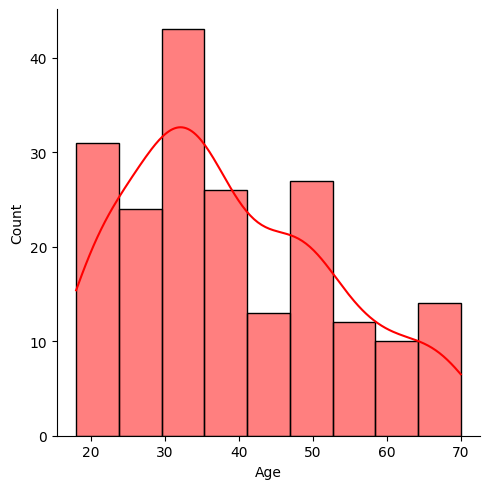

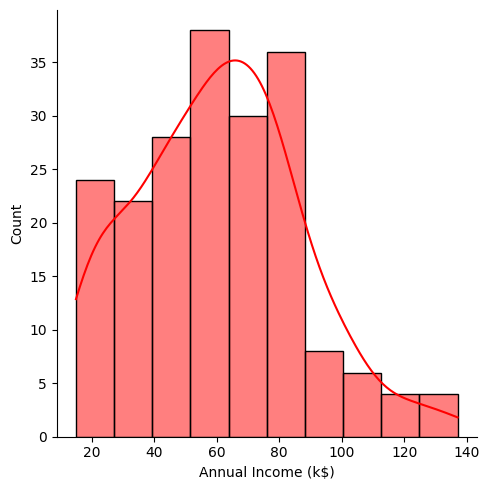

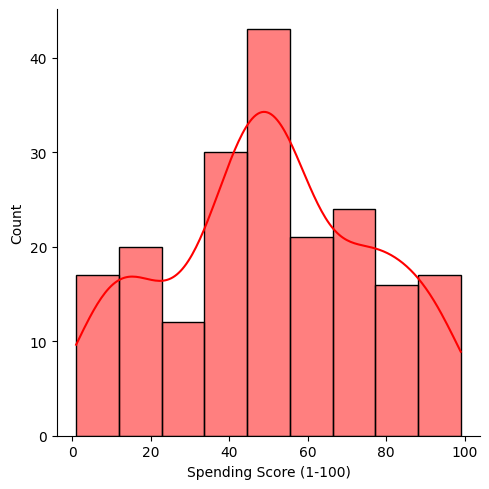

In [8]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in cols:
    sns.displot(data[col] , color = 'red' , kde=True)



# Box Plot (2)

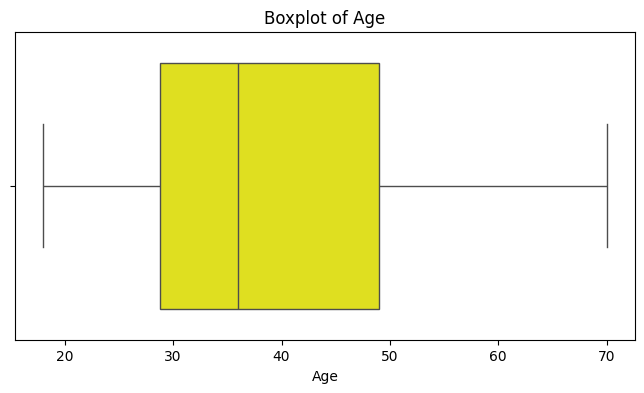

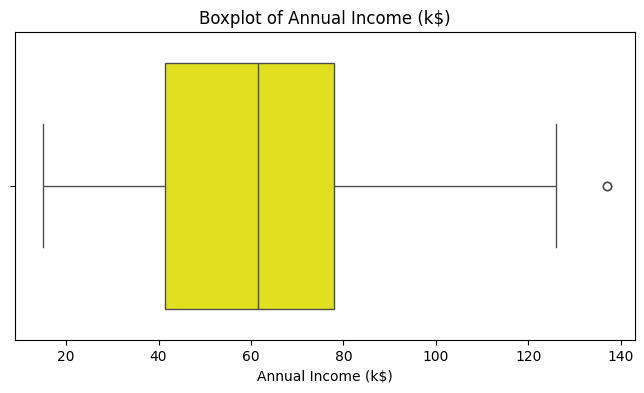

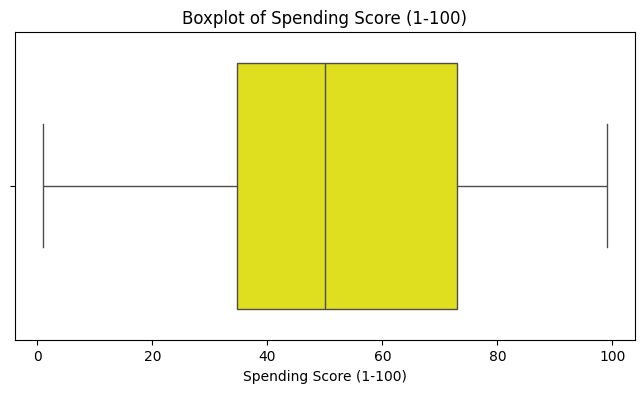

In [11]:
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color="yellow")
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")
    plt.show()

# Scatter Plots for Relationships (3)

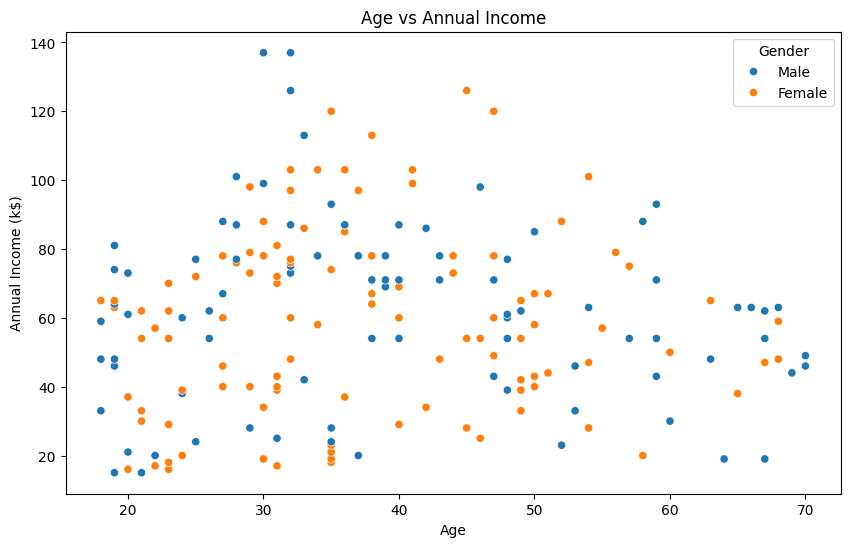

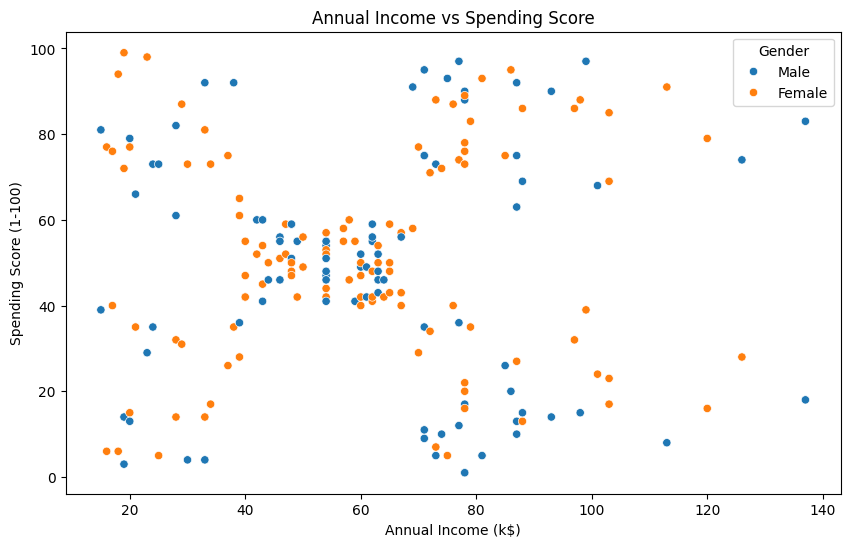

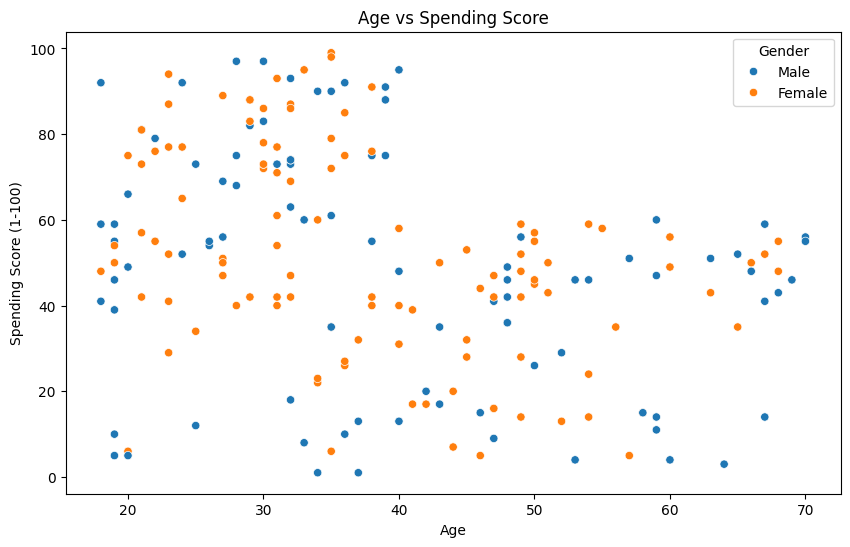

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Age"], y=data["Annual Income (k$)"], hue=data["Gender"])
plt.title("Age vs Annual Income")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Annual Income (k$)"], y=data["Spending Score (1-100)"], hue=data["Gender"])
plt.title("Annual Income vs Spending Score")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Age"], y=data["Spending Score (1-100)"], hue=data["Gender"])
plt.title("Age vs Spending Score")
plt.show()

# Heatmap (4) Coleration

<Axes: >

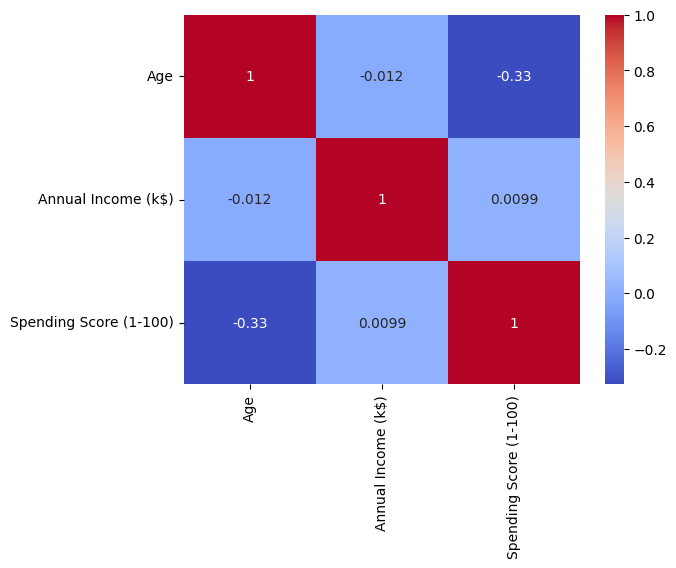

In [10]:
corr = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True , cmap='coolwarm')

# KMeans(Elbow)

In [14]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

In [15]:
wcss

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 37233.81451071001,
 35012.19402115787,
 25012.91706988548,
 22119.99312141347,
 20358.276646221995]

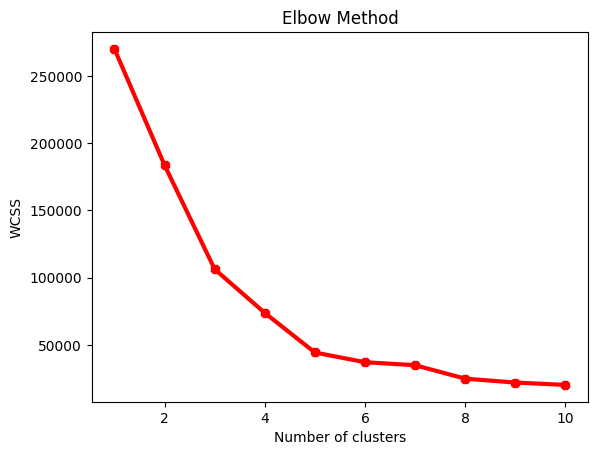

In [16]:
plt.plot(range(1,11), wcss , linewidth=3 , color='red' , marker='8')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
k_means = KMeans(n_clusters=5 , random_state =42)
y_means = k_means.fit_predict(X)

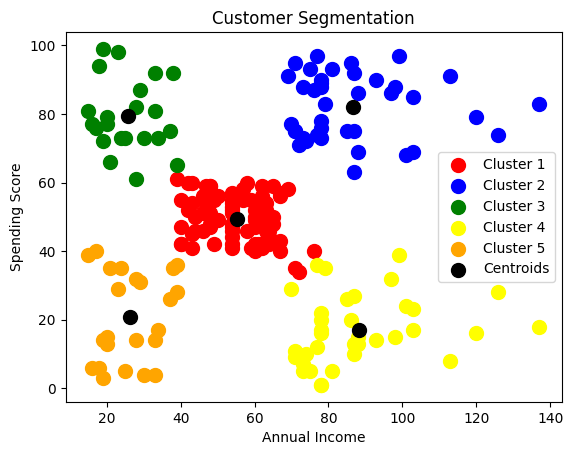

array([4], dtype=int32)

In [19]:
y_means
plt.scatter(X.iloc[y_means == 0 , 0] ,  X.iloc[y_means == 0 , 1] , s = 100 , c='red' , label='Cluster 1')
plt.scatter(X.iloc[y_means == 1 , 0] ,  X.iloc[y_means == 1 , 1] , s = 100 , c='blue' , label='Cluster 2')
plt.scatter(X.iloc[y_means == 2 , 0] ,  X.iloc[y_means == 2 , 1] , s = 100 , c='green' , label='Cluster 3')
plt.scatter(X.iloc[y_means == 3 , 0] ,  X.iloc[y_means == 3 , 1] , s = 100 , c='yellow' , label='Cluster 4')
plt.scatter(X.iloc[y_means == 4 , 0] ,  X.iloc[y_means == 4, 1] , s = 100 , c='orange' , label='Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0] , k_means.cluster_centers_[:,1] , s = 100 , c='black' , label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')    
plt.legend()
plt.show()

k_means.predict([[10,15]])

# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
x_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps = 0.40 , min_samples = 3)
labels = dbscan.fit_predict(x_scaled)

data['Clusters'] = labels

# Plot the clusters

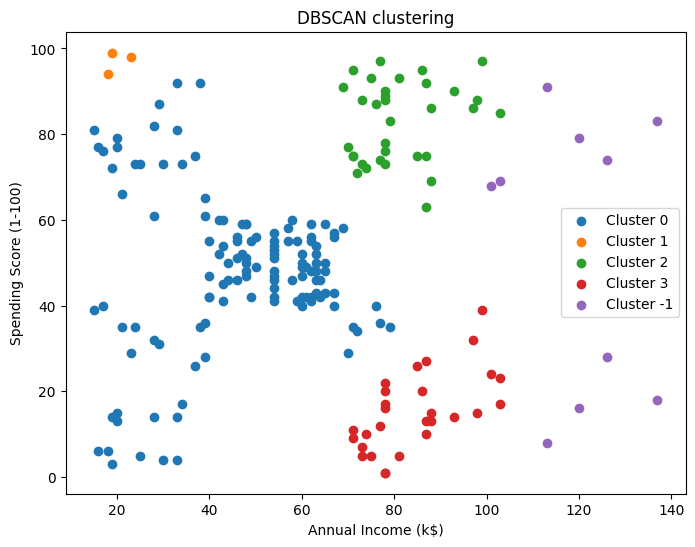

In [21]:
plt.figure(figsize=(8,6))
for cluster in set(labels):
    plt.scatter(X.iloc[labels == cluster , 0] , X.iloc[labels == cluster , 1] , label = f"Cluster {cluster}")
plt.title("DBSCAN clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Lets Save the Model

In [22]:
import pickle

In [24]:
pickle.dump(k_means, open('k_means.pkl', 'wb'))